## Softmax Regression using Tensorflow
For reference visit [https://www.geeksforgeeks.org/softmax-regression-using-tensorflow/](Softmax Regression)

### Step 1: Import the dependencies

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Download the data
- MNIST_data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Step 3: Understanding data
MNIST_data is split into three parts
- mnist.train
- mnist.test
- mnist.validation

Each image is **28 x 28** pixels which has been flattened into 1-D numpy array of size **784**.
Number of class labels is 10.
Each target label is already provided in one-hot encoded form

('Shape of feature matrix: ', (55000, 784))
('Shape of target matrix: ', (55000, 10))
('One-hot encoding for 1st observation: \n', array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]))


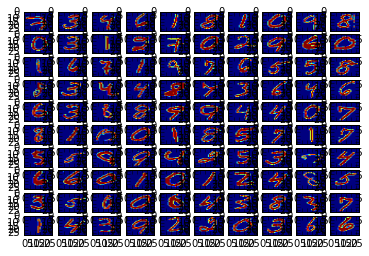

In [3]:
print("Shape of feature matrix: ", mnist.train.images.shape)
print("Shape of target matrix: ", mnist.train.labels.shape)
print("One-hot encoding for 1st observation: \n", mnist.train.labels[0])

# visualize data by plotting images
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(mnist.train.images[k].reshape(28, 28), aspect='auto')
        k+=1
plt.show()

### Step 4: Defining computation graph
Now, creating a computation graph
- The weight matrix is initialized using random values following a (truncated) normal distribution. This is achieved using **tf.truncated_normal** method
- The biases get initialized to zero using **tf.zeros** method
- Inputs are multiplied by weight matrix, and biases are added
- Compute softmax and cross-entropy using **tf.nn.softmax_cross_entropy_with_logits**
- Average the cross-entropy across all training examples using **tf.reduce_mean** method
- To minimize loss, we used gradient descent. **tf.train.GradientDescentOptimizer** is used for this purpose

In [4]:
# number of features
num_features = 784
# number of target labels
num_labels = 10
# learning rate (alpha)
learning_rate = 0.05
# batch size
batch_size = 128
# number of epochs
num_steps = 5001
 
# input data
train_dataset = mnist.train.images
train_labels = mnist.train.labels
test_dataset = mnist.test.images
test_labels = mnist.test.labels
valid_dataset = mnist.validation.images
valid_labels = mnist.validation.labels

In [5]:
#initialize a tensorflow graph
graph = tf.Graph()
with graph.as_default():
    # Inputs
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, num_features))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)
    
    # Variables
    weights = tf.Variable(tf.truncated_normal([num_features, num_labels]))
    biases  = tf.Variable(tf.zeros([num_labels]))
    
    # Training computation
    logits = tf.matmul(tf_train_dataset, weights) + biases
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
                    labels=tf_train_labels, logits=logits))
    
    # Optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    # Predictions for the training, validation and test datasets
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(tf.matmul(tf_valid_dataset, weights) + biases)
    test_prediction  = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases)
    

### Step 5: Running the computation graph

In [6]:
# utility function to calculate accuracy
def accuracy(predictions, labels):
    correctly_predicted = np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
    accu = (100.0 * correctly_predicted) / predictions.shape[0]
    return accu

with tf.Session(graph=graph) as session:
    # initialize weights and biases
    tf.global_variables_initializer().run()
    print("Initialized")
    
    for step in range(num_steps):
        # pick a randomized offset
        offset = np.random.randint(0, train_labels.shape[0] - batch_size - 1)
        # Generate a minibatch.
        batch_data = train_dataset[offset:(offset + batch_size), :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
 
        # Prepare the feed dict
        feed_dict = {tf_train_dataset : batch_data,
                     tf_train_labels : batch_labels}
 
        # run one step of computation
        _, l, predictions = session.run([optimizer, loss, train_prediction],
                                        feed_dict=feed_dict)
 
        if (step % 500 == 0):
            print("Minibatch loss at step {0}: {1}".format(step, l))
            print("Minibatch accuracy: {:.1f}%".format(
                accuracy(predictions, batch_labels)))
            print("Validation accuracy: {:.1f}%".format(
                accuracy(valid_prediction.eval(), valid_labels)))
 
    print("\nTest accuracy: {:.1f}%".format(
        accuracy(test_prediction.eval(), test_labels)))

Initialized
Minibatch loss at step 0: 14.3061828613
Minibatch accuracy: 4.7%
Validation accuracy: 6.1%
Minibatch loss at step 500: 1.82417058945
Minibatch accuracy: 61.7%
Validation accuracy: 63.7%
Minibatch loss at step 1000: 1.20762383938
Minibatch accuracy: 78.1%
Validation accuracy: 74.8%
Minibatch loss at step 1500: 0.84621655941
Minibatch accuracy: 78.1%
Validation accuracy: 79.0%
Minibatch loss at step 2000: 1.07438528538
Minibatch accuracy: 80.5%
Validation accuracy: 81.9%
Minibatch loss at step 2500: 0.822806835175
Minibatch accuracy: 82.8%
Validation accuracy: 83.4%
Minibatch loss at step 3000: 0.493920773268
Minibatch accuracy: 89.1%
Validation accuracy: 84.3%
Minibatch loss at step 3500: 0.423802316189
Minibatch accuracy: 86.7%
Validation accuracy: 85.1%
Minibatch loss at step 4000: 0.838949024677
Minibatch accuracy: 79.7%
Validation accuracy: 85.8%
Minibatch loss at step 4500: 0.427692979574
Minibatch accuracy: 83.6%
Validation accuracy: 86.1%
Minibatch loss at step 5000: 